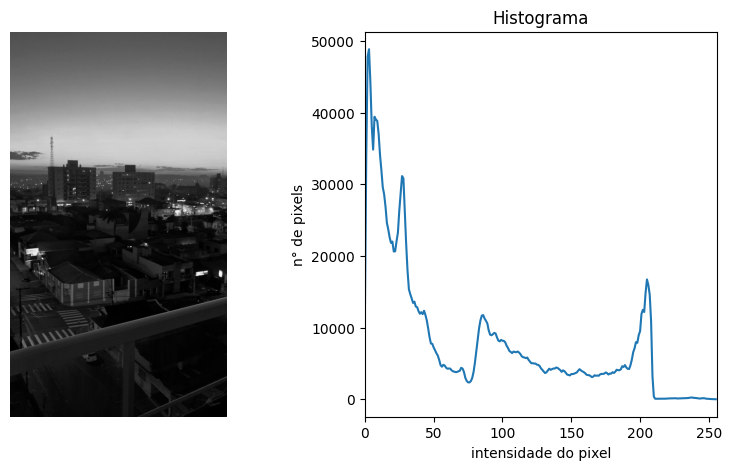

In [99]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from typing import Tuple
 
grayscale_image = cv2.imread('assets/dark(2).jpg')
grayscale_image = cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2GRAY)

def plot_grayscale_image_hist(image: cv2.typing.MatLike, title: str = 'Histograma'):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    _, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].axis("off")
    axs[0].imshow(image, cmap='gray')

    axs[1].set_title(title)
    axs[1].set_xlabel("intensidade do pixel")
    axs[1].set_ylabel("n° de pixels")
    axs[1].plot(hist)
    plt.xlim([0, 256])

plot_grayscale_image_hist(grayscale_image)

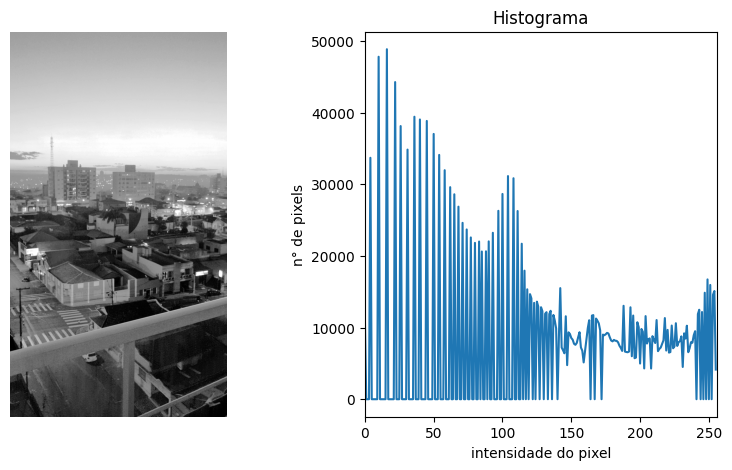

In [100]:
equalized_grayscale_image = cv2.equalizeHist(grayscale_image)
 
plot_grayscale_image_hist(equalized_grayscale_image)

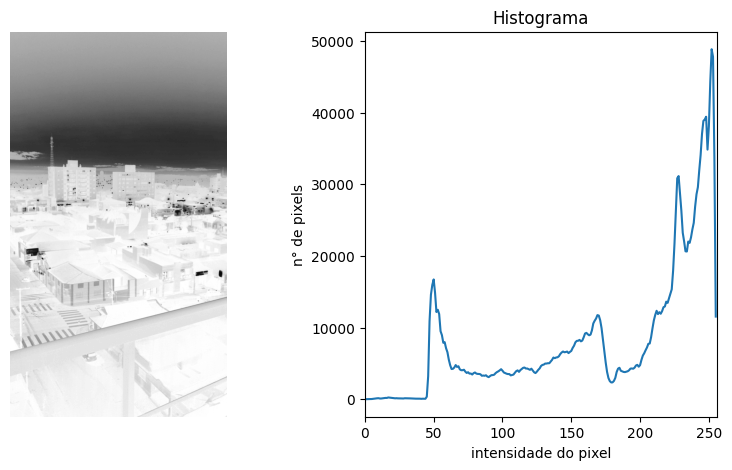

In [101]:
negative_grayscale_image = abs(255-grayscale_image)

plot_grayscale_image_hist(negative_grayscale_image)

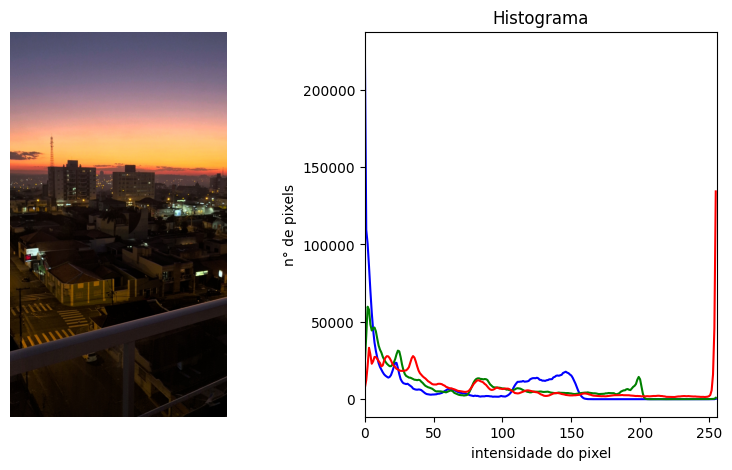

In [108]:
import imutils

colored_image = cv2.imread('assets/dark(2).jpg')
def plot_colored_image_hist(image: cv2.typing.MatLike, title: str = 'Histograma'):
    chans = cv2.split(image)
    colors = ("b", "g", "r")

    _, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].axis("off")
    axs[0].imshow(imutils.opencv2matplotlib(image))

    axs[1].set_title(title)
    axs[1].set_xlabel("intensidade do pixel")
    axs[1].set_ylabel("n° de pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])

        axs[1].plot(hist, color=color)
        plt.xlim([0, 256])

plot_colored_image_hist(colored_image)

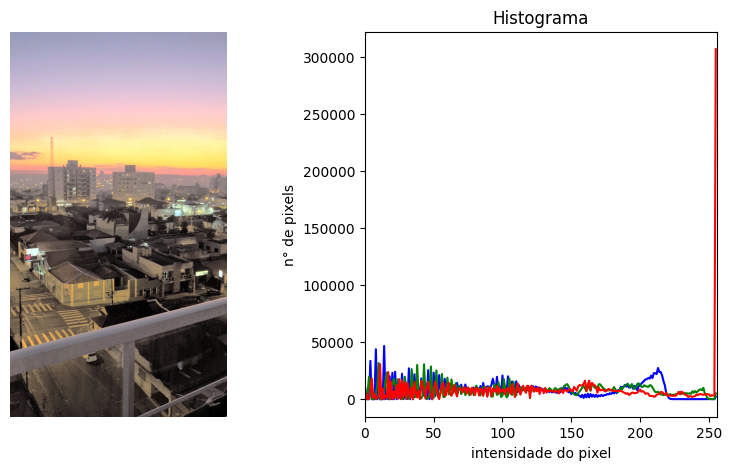

In [109]:
equalized_colored_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2YUV)
equalized_colored_image[:, :, 0] = cv2.equalizeHist(equalized_colored_image[:, :, 0])

equalized_colored_image = cv2.cvtColor(equalized_colored_image, cv2.COLOR_YUV2BGR)
plot_colored_image_hist(equalized_colored_image)

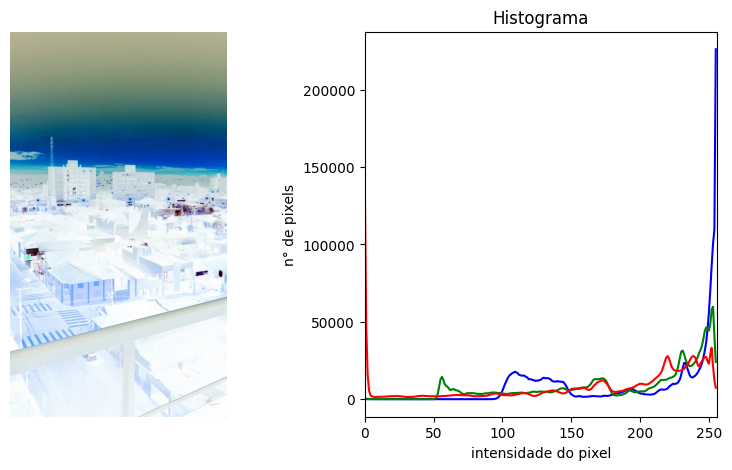

In [110]:
negative_colored_image = abs(255-colored_image)

plot_colored_image_hist(negative_colored_image)